# **About Dataset -- Dataset From KAGGLE**

## **Dataset --> drug200.csv(6.03 kB)**

**Problem statement**: Prediction of the drugs type that might be suitable for the patient.

This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient. Here we will use Random Forest Classifier to predict the outcome of the drug types and later we will plot AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) Curve.

**About the dataset:**

Age: Age of patient

Sex: Gender of patient

BP: Blood pressure of patient

Cholesterol: Cholesterol of patient

Na_to_K: Sodium to Potassium Ratio in Blood

Drug: Drug Type

**Content**

The target feature is

Drug type

The feature sets are:

Age

Sex

Blood Pressure Levels (BP)

Cholesterol Levels

Na to Potassium Ration

# **Dataset Upload**

In [ ]:
from google.colab import files
file = files.upload()

Saving drug200.csv to drug200.csv


# **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [ ]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# **Dataset Description**

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [ ]:
df.describe(include = 'object')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


In [ ]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Total no. of Rows and Columns in Dataset**





In [ ]:
df.shape

(200, 6)

# **Missing Data Checking**

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

The dataset does not have any missing data

# **The First 5 Columns of Dataset**

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# **The Last 5 Columns of Dataset**

In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


# **Mean Values Group by Drugs**


In [ ]:
df.groupby('Drug').mean()

,Age,Na_to_K
Drug,,
DrugY,43.747253,22.374780
drugA,35.869565,10.918783
drugB,62.500000,11.524375
drugC,42.500000,10.633750
drugX,44.018519,10.650556


# **Correlation**

In [ ]:
cor = df.corr()
cor

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


# **Heatmap**

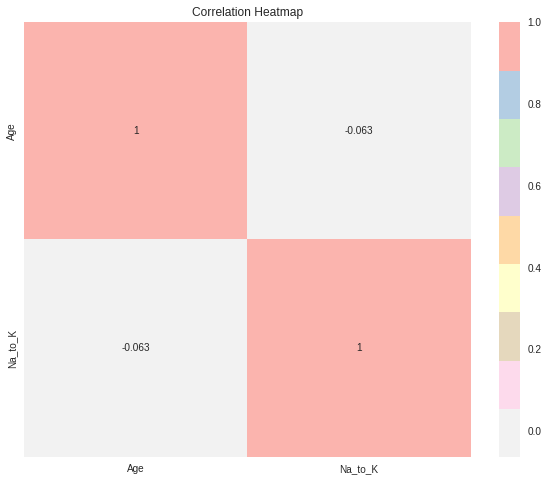

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot = True, cmap = 'Pastel1_r')
plt.title('Correlation Heatmap')
plt.show()

Here, we got only Age and Sodium to Potassium Ratio in Blood correlation, which is negative correlation.

# **Data preprocessing**

# **Label Encoder**

## **Using LabelEncoder to transform categorical variables into continuous variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name]) 

In [ ]:
label_encoding('Sex')
label_encoding('BP')
label_encoding('Cholesterol')

In [ ]:
label_encoder=LabelEncoder()
label_encoder.fit(df.Drug)
df.Drug = label_encoder.transform(df.Drug)
classes = label_encoder.classes_

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


# **Model Building**

# **Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis = 1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 45, stratify=y)

# **MinMax Scaler**

## **Applying MinMaxScaler in data to put the data in the same size setting**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.13559322, 0.        , 0.        , 0.        , 0.59684783],
       [0.54237288, 1.        , 0.5       , 0.        , 0.21339671],
       [0.54237288, 1.        , 0.5       , 0.        , 0.12023891],
       [0.22033898, 0.        , 1.        , 0.        , 0.04781412],
       [0.77966102, 0.        , 0.5       , 0.        , 0.36819063]])

In [ ]:
X_train.shape, X_test.shape

((140, 5), (60, 5))

# **Random Forest Classifier**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100, max_features = 5, random_state = 45)

rf.fit(X_train, y_train)

predict = rf.predict(X_test)

predict

array([4, 4, 3, 0, 4, 0, 0, 3, 1, 0, 0, 4, 2, 0, 4, 4, 4, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 4, 4, 0, 0, 1, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0,
       0, 4, 4, 0, 0, 1, 4, 1, 0, 4, 1, 2, 4, 4, 1, 4])

# **Evaluation Metric**

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.88      1.00      0.93         7
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        16

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



#**Accuracy**

**Accuracy of Training & Testing**

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predict)
print('accuracy_score: ', acc)

accuracy_score:  0.9833333333333333


In [ ]:
rf_train_score = rf.score(X_train, y_train)

rf_test_score= rf.score(X_test, y_test)


print('Random Forest Classifier Train Score is : ' , rf_train_score)

print('Random Forest Classifier Test Score is : ' , rf_test_score)

Random Forest Classifier Train Score is :  1.0
Random Forest Classifier Test Score is :  0.9833333333333333


In [ ]:
from sklearn import  metrics

rf_acc = 100*rf.score(X_test, y_test)
print('Random Forest Classifier Predictions : \n', rf.predict(X_test), '\n Accuracy:', rf_acc, '%')



Random Forest Classifier Predictions : 
 [5 1 1 1 2 1 1 4 2 2 1 2 3 1 1 1 3 2 1 1 2 5 2 1 1 1 2 2 3 4 1 1 1 1 1 1 1
 1 1 3 3 1 5 4 2 4 2 2 3 2 2 2 1 5 3 5 4 1 1 1] 
 Accuracy: 98.33333333333333 %


#**Predicting New Data**

In [ ]:
X_test.iloc[30]

Age            23.00
Sex             1.00
BP              2.00
Cholesterol     0.00
Na_to_K        16.85
Name: 109, dtype: float64

In [ ]:
rf.predict([X_test.iloc[30]])

array([0])

#**AUC-ROC Curve**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=5))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

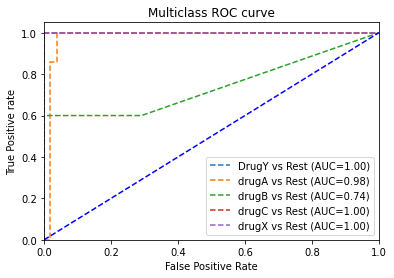

[2.         1.         0.98989899 0.98039216 0.95959596 0.95238095
 0.76666667 0.00990099 0.00980392 0.00952381 0.        ] [0.     0.1875 0.3125 0.4375 0.6875 0.8125 1.     1.     1.     1.
 1.    ] [0.         0.         0.         0.         0.         0.
 0.         0.29545455 0.34090909 0.36363636 1.        ]


In [ ]:
from sklearn.preprocessing import label_binarize


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# ROC Curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting    
    pyplot.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
pyplot.plot([0,1],[0,1],'b--')
pyplot.xlim([0,1])
pyplot.ylim([0,1.05])
fpr, tpr, thresholds = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
pyplot.title('Multiclass ROC curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive rate')
pyplot.legend(loc='lower right')
plt.show()
